<a href="https://colab.research.google.com/github/ucfilho/Raianars_SelfTest_July_2020/blob/master/Frank_Noisy_Quartic_change_Diversity_jun_28_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Noisy_Quartic
# In the paper Ngen=3000
# JADE: Adaptive Differential Evolution with Optional External Archive

In [2]:
!git clone https://github.com/ucfilho/Raianars_July_2020 #clonar do Github
%cd Raianars_July_2020

Cloning into 'Raianars_July_2020'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 67 (delta 28), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (67/67), done.
/content/Raianars_July_2020


In [3]:
import Go2Ann
import de_soma_Insight
import de_bounds_matriz
import Function
import Go2MinMax
from AvaliaX import AvaliaX
from GeraIndices import GeraIndices

############################### DADOS DE ENTRADA 
RUNS=50 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=3000 #10 # PONTOS quantas vezes vai alteral NPAR 
NPAR=100
Alpha=0.25
mut=0.5
crossp=0.5
Fi=mut;CRi=crossp;# para impressão

############################### Função
dim=30
Change=int(Alpha*NPAR)
#fchoice='Rastrigin' #fchoice='Michalewicz' #fchoice='Schwefel'
fchoice='Noisy_Quartic'
Fun=Function.Noisy_Quartic

MIN,MAX=Go2MinMax.Intervalo(dim,fchoice)
PAR=len(MAX) #NUM DE PARAMETROS A SER OTIMIZADOS


In [4]:
import time
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

In [5]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

Cloning into 'ANN_read_matrix'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.
/content/Raianars_July_2020/ANN_read_matrix


In [6]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [7]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [8]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [9]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [10]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [11]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [12]:
##################################### 

#TOTAL=7*dim*its*ITE
TOTAL=10*dim*its*ITE
#TOTAL=int(TOTAL/2)   # CONFERIR SE ESTE EH O MELHOR LUGAR

dimensions=len(MAX)
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO


MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
for i in range(rodadas):
  SOMA=0
  pop = np.random.rand(NPAR, dimensions)
  diff=np.zeros(PAR)
  for ii in range(PAR):
    diff[ii] = MAX[ii]-MIN[ii]
  X = MIN + pop * diff
    
  PONTOS=ITE # DIVISOES DA POPULACAO





In [13]:
#NPAR=int(NPAR/2)
start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for i in range(RUNS):
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    SOMAf=0
    start_ite = time.time()
    delta_time=(start_ite-start_time)/60
    
    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(PAR)
    for ii in range(PAR):
      diff[ii] = MAX[ii]-MIN[ii]
    X = MIN + pop * diff

    
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    Fitness = np.asarray([Fun(ind) for ind in X])

    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X,Fitness)
    nrow,ncol=X.shape

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo
  
    MAT_INDo=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fun)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo
    #ind_crossp=ITE-1

    
    for k in range(ITE):
      X,BEST,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR,its,Fun,X,SOMA,TOTAL)
      #Xf,BESTf,FOBESTf,XYf,BEST_XYf,SOMAf= de_soma_Insight.de(MAX,MIN, Fi, CRi, NPAR,its,Fun,Xf,SOMAf,TOTAL)

      
      MAT_IND=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,Fc,fields,Fun)
    
      BESTo=np.copy(BEST);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]

      Fitness = np.asarray([Fun(ind) for ind in X])
      #Fitnessf = np.asarray([Fun(ind) for ind in Xf])
      Maior=np.argmax(Fitness)
      #Maiorf=np.argmax(Fitnessf)
      Menor=np.argmin(Fitness)
      Xkeep=X[Menor,:]

      #X[Maior,:]=np.copy(Xf[Menorf,:])
      #Xf[Maiorf,:]=np.copy(X[Menor,:])
      
      pop = np.random.rand(Change, dimensions)
      diff=np.zeros(Change)
      X_change=np.zeros((Change,dim))
      for ii in range(Change):
        for jj in range(dim):
          X_change[ii,jj] =MIN[jj]+(MAX[jj]-MIN[jj])*pop[ii,jj]

        X[ii,:]=np.copy(X_change[ii,:]) # replace propulation
        
      
      X[Maior,:]=np.copy(Xkeep) # give the best back case it lost...

      
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    print('ite=',i,'total=50','time=',delta_time,"Funcao=",FOBEST)
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

ite= 0 total=50 time= 8.896986643473308e-06 Funcao= 0.5777793354273291
ite= 1 total=50 time= 3.439670475323995 Funcao= 0.4643808171002992
ite= 2 total=50 time= 6.849244634310405 Funcao= 0.40032406598630194
ite= 3 total=50 time= 10.257229657967885 Funcao= 0.23737379723027913
ite= 4 total=50 time= 13.670678933461508 Funcao= 0.33886479969307504
ite= 5 total=50 time= 17.09072278738022 Funcao= 0.32100558287353886
ite= 6 total=50 time= 20.526159433523812 Funcao= 0.512688807629321
ite= 7 total=50 time= 23.9468866109848 Funcao= 0.46223478529175255
ite= 8 total=50 time= 27.38185510238012 Funcao= 0.5589808278733772
ite= 9 total=50 time= 30.814217340946197 Funcao= 0.31420709008551423
ite= 10 total=50 time= 34.25256391366323 Funcao= 0.4926461971711795
ite= 11 total=50 time= 37.67977414131165 Funcao= 0.40886199115307476
ite= 12 total=50 time= 41.06997779607773 Funcao= 0.34091230299830516
ite= 13 total=50 time= 44.49327679872513 Funcao= 0.45708115108710407
ite= 14 total=50 time= 47.91827434698741 Fu

In [14]:
print(pop.shape)
print(diff.shape)
print(MIN.shape)

(25, 30)
(25,)
(30,)


In [15]:
# print(TOTAL)

In [16]:
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)



In [17]:
pd.set_option('display.max_columns', 30)  
print(df)

      DIVERSIDADE (DI)  DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X     NP  \
0             3.947068     0.986476  0.000111         1.0      0.0  100.0   
1             3.776300     0.943796  0.000222         1.0      0.0  100.0   
2             3.790402     0.947321  0.000333         1.0      2.0  100.0   
3             3.724414     0.930828  0.000444         1.0      2.0  100.0   
4             3.676792     0.918927  0.000556         1.0      2.0  100.0   
...                ...          ...       ...         ...      ...    ...   
2995          2.104254     0.525908  0.332889         1.0      2.0  100.0   
2996          2.080641     0.520007  0.333000         1.0      2.0  100.0   
2997          2.120756     0.530032  0.333111         1.0      2.0  100.0   
2998          2.084748     0.521033  0.333222         1.0      1.0  100.0   
2999          2.121122     0.530124  0.333333         1.0      2.0  100.0   

            Fo           CRo       fmin        fmax  AD_fmin  AD_fmax  \
0 

Text(0, 0.5, 'CR')

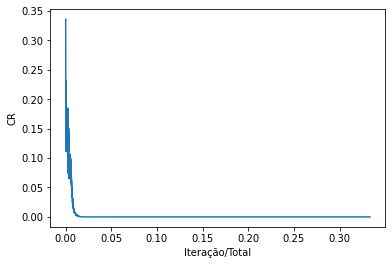

In [18]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

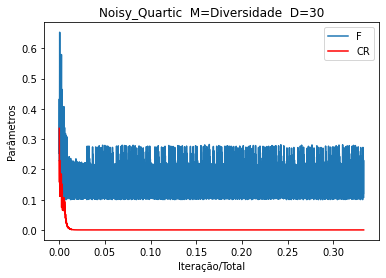

In [19]:

fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()


Text(0.5, 1.0, 'Noisy_Quartic_Diversidade_D=30')

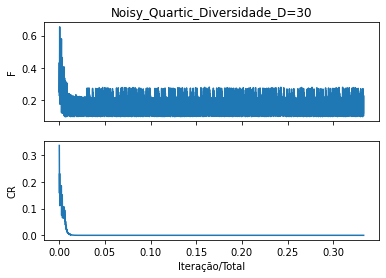

In [20]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)


In [21]:
nome='_ANN_Div3x4_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('DE_POP_VAR_F_CR','TOTAL=',TOTAL,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1])
print('MIN __:',MINFO)
print('MAX__: ',MAXFO)
print('STD __:',STD)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)
# print('melhor=',BEST_AGENTS[BEST_INDEX])

DE_POP_VAR_F_CR TOTAL= 900000 Iterações= 3000 Dim= 30 Min/Max= -1.28 / 1.28 _ Noisy_Quartic
_ANN_Div3x4_Fo-0.5_CRo-0.5_D-30_Interv-3000 

MÉDIA:  0.3964152056447107
MIN __: 0.22309866441313297
MAX__:  0.6498927189223336
STD __: 0.09124090592567276
Tempo Médio= 205.417 segundos ---
50 Rodadas

BEST:  [-0.266283    0.11042682  0.07443858 -0.083192   -0.27367176  0.16314464
  0.16908873  0.14175954 -0.01434177  0.02282236  0.21920384 -0.11051811
 -0.05005399  0.00584975  0.11179957  0.0756281   0.18471738 -0.06034302
 -0.07589176 -0.08657967 -0.09797687 -0.10610293  0.08149283 -0.05181608
 -0.00105067  0.01197043  0.06957768 -0.01092836 -0.08459935 -0.24881514
  0.22309866]
